# Percy the Perceptron 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Perceptron Class

In [13]:
class Perceptron:
    def __init__(self, learn_rate=0.1, num_iters=10):
        self.learn_rate = learn_rate
        self.num_iters = num_iters
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.num_iters):
            errors = 0
            for xi, target in zip(X, y):
                update_value = self.learn_rate * (target - self.predict(xi))
                self.w_[1:] += update_value * xi
                self.w_[0] += update_value
                errors += int(update_value != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Use vector dot product as wT*X"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
            

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Visualizing the data

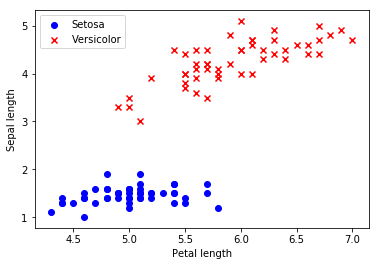

In [10]:
# Select only Setosa and Versicolor tags as target values
y = df.iloc[0:100, 4].values
# Change the target labels to numeric data for easy handling
y = np.where(y == 'Iris-setosa', -1, 1)
# Select the Setosa and Versicolor sepal and petal length values
X = df.iloc[0:100, [0, 2]].values

# Plot it!
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', marker='x', label='Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.legend(loc='upper left')
plt.show()

## Perceptron performance

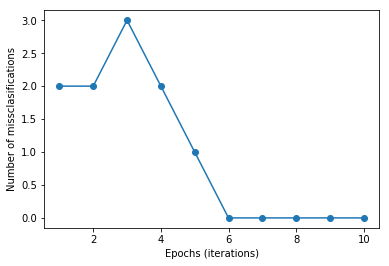

In [14]:
# Create a perceptron instance
ppn = Perceptron(learn_rate=0.1, num_iters=10)
# Train the model, this is where the magic happens
ppn.fit(X, y)
# Plot the misclassification error as the iterations try to converge
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs (iterations)')
plt.ylabel('Number of missclasifications')
plt.show()

## Decision zone plotting function

In [22]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # Use the trained model
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Some more plotting stuff
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot some class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

## Classify and plot decision zones

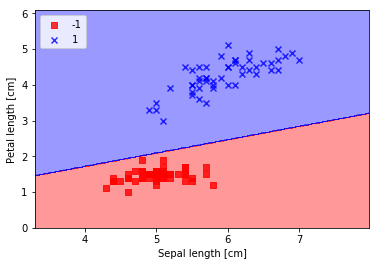

In [23]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()